# Weather Forecast Analysis using Random Forest

This notebook analyzes weather data to predict rainfall using a Random Forest Classifier.

## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
import matplotlib.pyplot as plt

## 2. Load and Explore Data

In [2]:
# Read the dataset
weather_data = pd.read_csv('weather_forecast_data.csv')

# Display first few rows and basic information
print("First few rows of the dataset:")
display(weather_data.head())

print("\nDataset information:")
display(weather_data.info())

First few rows of the dataset:


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


None

## 3. Data Preprocessing

In [4]:
# Split features and target
X = weather_data.drop('Rain', axis=1)
y = weather_data['Rain'].map({'no rain': 0, 'rain': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Initial Model Training

In [5]:
# Create and train initial model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate initial metrics
initial_accuracy = accuracy_score(y_test, y_pred)
initial_precision = precision_score(y_test, y_pred)
initial_recall = recall_score(y_test, y_pred)

print("Initial Model Performance:")
print(f"Accuracy: {initial_accuracy:.3f}")
print(f"Precision: {initial_precision:.3f}")
print(f"Recall: {initial_recall:.3f}")

Initial Model Performance:
Accuracy: 0.998
Precision: 1.000
Recall: 0.982


## 5. Hyperparameter Tuning

In [10]:
# Define parameter distribution for random search
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(1, 20)
}

# Create random search object
rand_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=5,
    cv=5,
    random_state=42
)

# Fit random search
rand_search.fit(X_train, y_train)

print("Best parameters:", rand_search.best_params_)

Best parameters: {'max_depth': 7, 'n_estimators': 485}


## 5.1 Visualizing Decision Trees

In [11]:
# Import visualization libraries
from sklearn.tree import export_graphviz
import graphviz

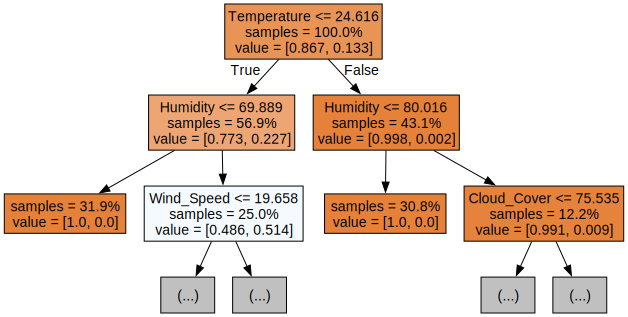

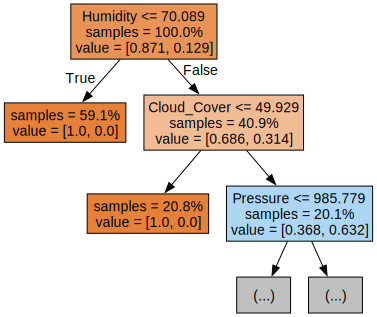

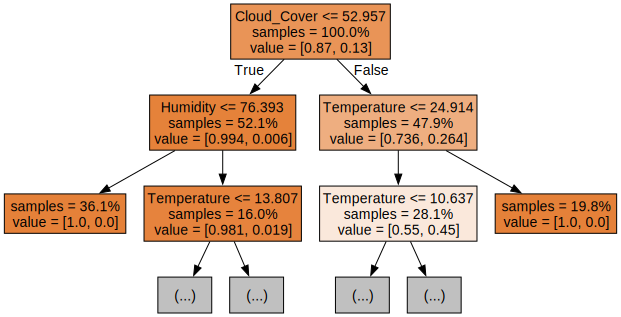

In [12]:
# Export and visualize the first three decision trees from the forest
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                              feature_names=X_train.columns,
                              filled=True,
                              max_depth=2,
                              impurity=False,
                              proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

## 6. Final Model Evaluation

Final Model Performance:
Accuracy: 0.998
Precision: 1.000
Recall: 0.982


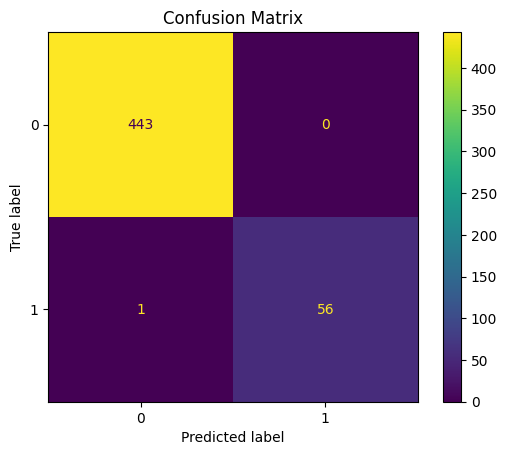

In [9]:
# Get best model
best_rf = rand_search.best_estimator_

# Make predictions with best model
y_pred_best = best_rf.predict(X_test)

# Calculate metrics
final_accuracy = accuracy_score(y_test, y_pred_best)
final_precision = precision_score(y_test, y_pred_best)
final_recall = recall_score(y_test, y_pred_best)

print("Final Model Performance:")
print(f"Accuracy: {final_accuracy:.3f}")
print(f"Precision: {final_precision:.3f}")
print(f"Recall: {final_recall:.3f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

## 7. Feature Importance Analysis

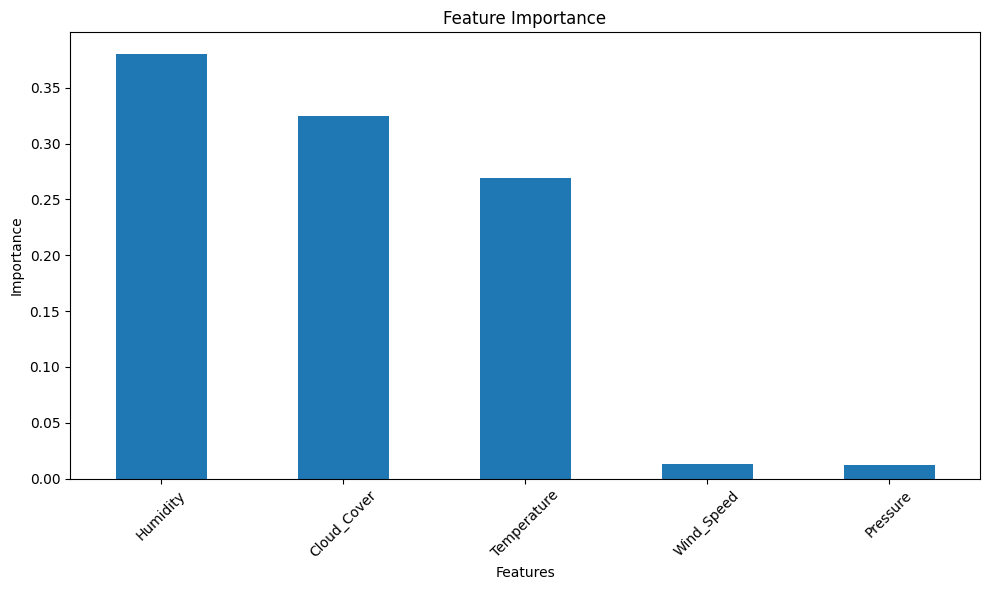

In [8]:
# Get feature importance
feature_importance = pd.Series(
    best_rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()